In [146]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import silhouette_score
from tqdm import tqdm

В ДЗ использован датасет https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [120]:
df = pd.read_csv('creditcard.csv', sep=',')

In [121]:
df.shape

(284807, 31)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [123]:
rows = df.shape[0]
cols = df.shape[1]
numeric_rows = len(df.select_dtypes([np.number]).columns)

In [124]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [125]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [126]:
print(f'Анализ датасета после работы с признаками: {rows} наблюдений и {cols} признак, все числовые')
print(f'Пропусков в данных нет')
print(f'Проверим количество наблюдений разных классов:')

Анализ датасета после работы с признаками: 284807 наблюдений и 31 признак, все числовые
Пропусков в данных нет
Проверим количество наблюдений разных классов:


In [127]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [128]:
def feature_plot_class(feature_class):
    print(f'Диаграммы распределения для Class={feature_class}')
    fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(18, 54))
    axes = axes.ravel()
    for feature_index, ax in enumerate(axes):
        ax.figure
        ax.hist(df[df.columns[feature_index]].loc[df['Class'] == feature_class], 100, alpha=1.0, label=f'Class={feature_class}', color="skyblue" if feature_class==0 else "orange")
        ax.legend(loc='upper right')
        ax.set_title(df.columns[feature_index])
    plt.tight_layout()
    plt.show()

In [129]:
# for feat_class in list(df['Class'].unique()):
#     feature_plot_class(feat_class)

In [130]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [131]:
print(f'Количество наблюдений с Class=1: {round(df["Class"].value_counts()[1] * 100.0 / df["Class"].value_counts()[0], 3)}%') 

Количество наблюдений с Class=1: 0.173%


3-сигмы:

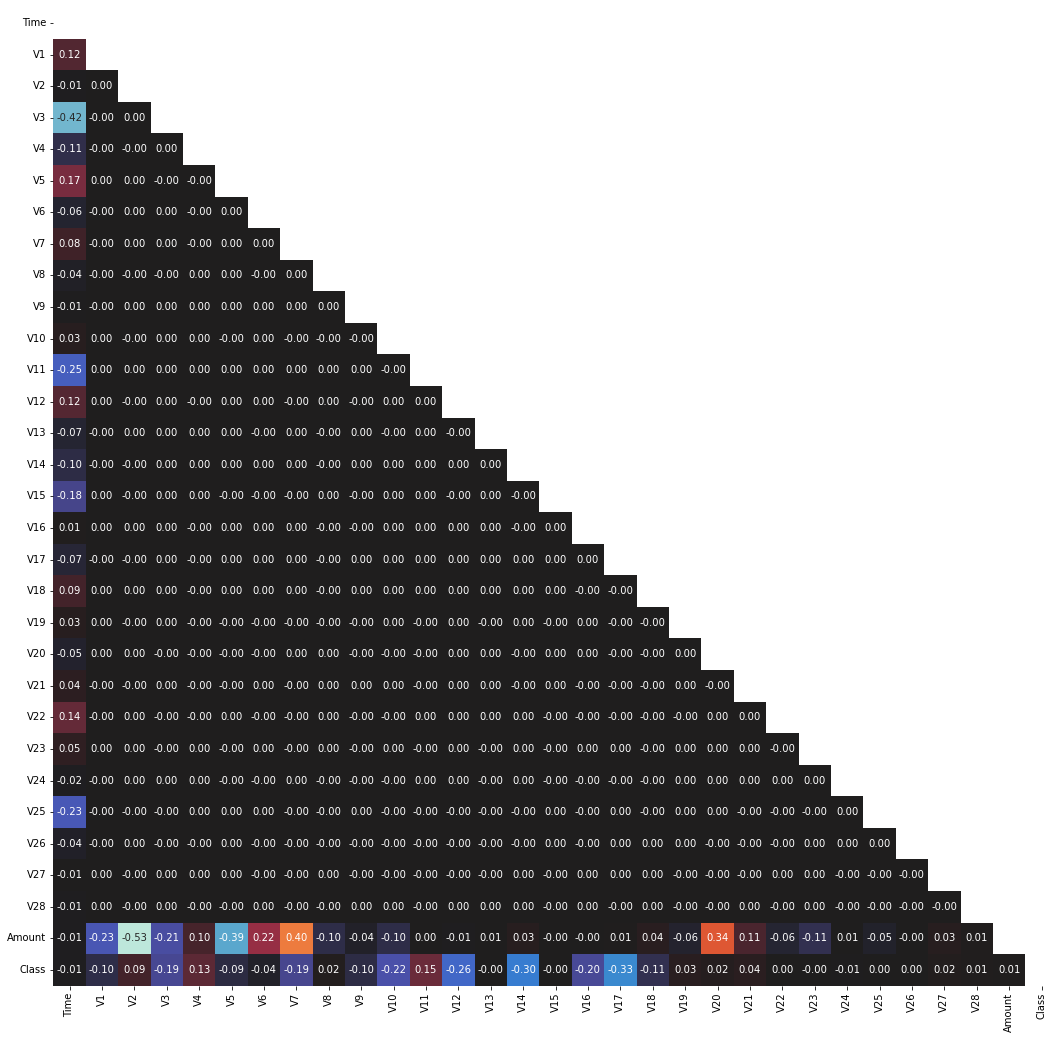

In [132]:
plt.figure(figsize=(18,18))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [133]:
high_corr = []
high_corr_matrix = corr_matrix[((corr_matrix >= 0.2) | (corr_matrix <= -0.2)) & (corr_matrix != 1.000)]
df_corr_matrix = pd.DataFrame(high_corr_matrix.unstack().sort_values(ascending=False).dropna())
for feature_pair in df_corr_matrix.index:
    if feature_pair[0] == 'Class':
        high_corr.append(feature_pair[1])
    if feature_pair[1] == 'Class':
        high_corr.append(feature_pair[0])
high_corr = list(set(high_corr))
print(f'Признаки, наиболее коррелированные с признаком "Class": {high_corr}')

Признаки, наиболее коррелированные с признаком "Class": ['V14', 'V12', 'V10', 'V17']


In [134]:
# print(f'Диаграммы распределения для наиболее коррелированных признаков')
# fig, axes = plt.subplots(nrows=int(len(high_corr)/2), ncols=2, figsize=(18, 54))
# axes = axes.ravel()
# for feature_index, ax in enumerate(axes):
#     ax.figure
#     sns.boxplot(x=high_corr[feature_index], y='Class', data=df, hue='Class', orient='h',width=0.2, saturation=0.9, ax=ax);
#     ax.legend(loc='upper right')
#     ax.set_title(high_corr[feature_index])
# plt.tight_layout()
# plt.show()

In [135]:
high_corr.append('Class')
high_corr_list = high_corr.copy()
df_high_corr = df[high_corr_list]

In [136]:
df_high_corr

,V14,V12,V10,V17,Class
0,-0.311169,-0.617801,0.090794,0.207971,0
1,-0.143772,1.065235,-0.166974,-0.114805,0
2,-0.165946,0.066084,0.207643,1.109969,0
3,-0.287924,0.178228,-0.054952,-0.684093,0
4,-1.119670,0.538196,0.753074,-0.237033,0
...,...,...,...,...,...
284802,4.626942,2.711941,4.356170,1.991691,0
284803,-0.675143,0.915802,-0.975926,-0.025693,0
284804,-0.510602,0.063119,-0.484782,0.313502,0
284805,0.449624,-0.962886,-0.399126,0.509928,0


<Figure size 1152x1152 with 0 Axes>

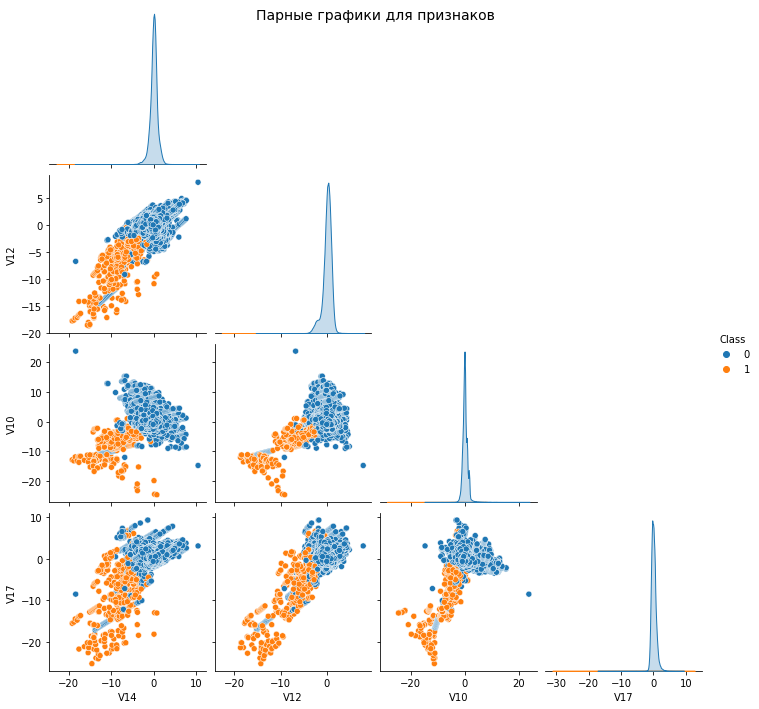

In [85]:
# plt.figure(figsize=(16, 16))
# sns.pairplot(data=df_high_corr, hue='Class', corner=True).fig.suptitle('Парные графики для признаков', fontsize = 14);
# plt.show();

In [137]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Число аномалий:\t\t{}\nПроцент аномалий:\t{:.2f}%".format(sum(outliers), 100*sum(outliers)/len(outliers)))    

In [138]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V10,3.421971,-3.503473,3208.0,1.126377
V14,3.249321,-3.181746,2405.0,0.844431
V17,3.049945,-3.134018,1449.0,0.508766
V12,3.689667,-3.477000,1305.0,0.458205


In [139]:
data_features = df_high_corr.drop(['Class'], axis=1)
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Число аномалий:		9474
Процент аномалий:	3.33%


С помощью диаграмм размаха:

Диаграммы размаха признаков


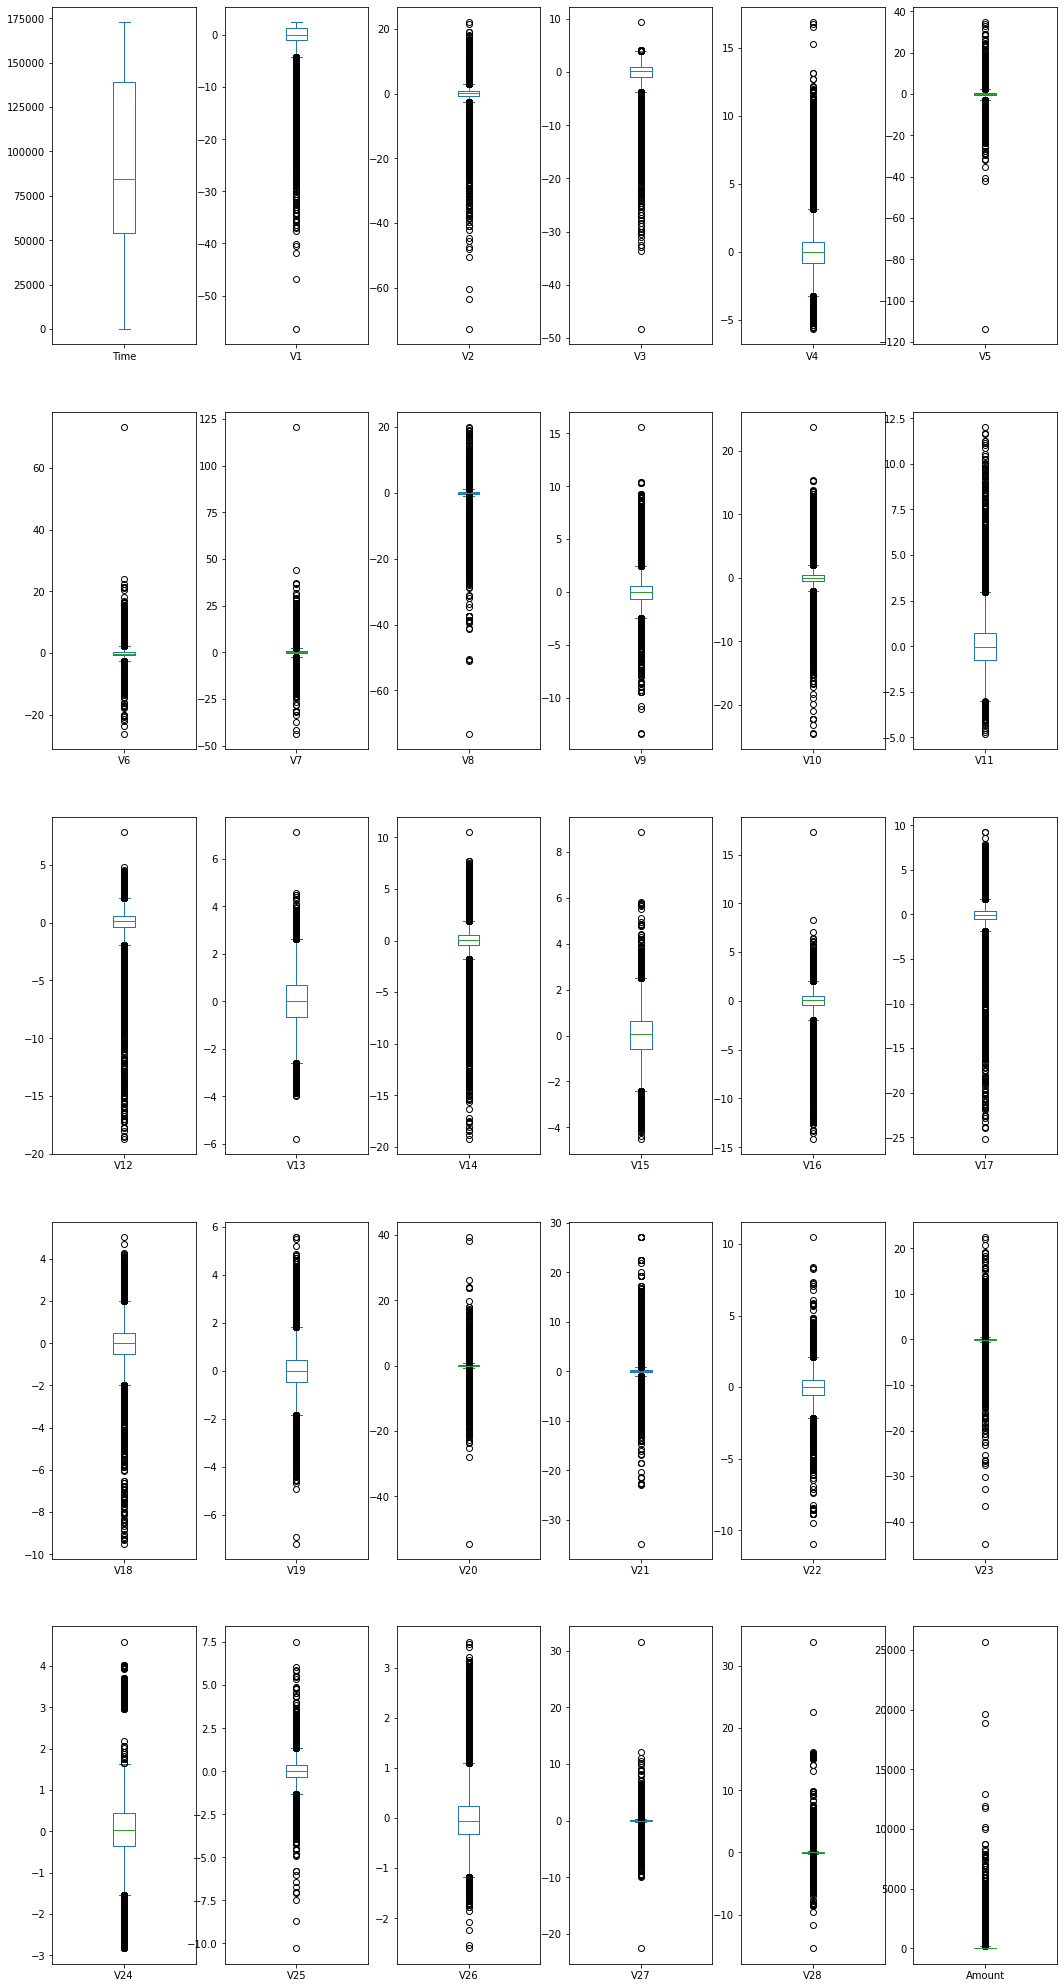

In [140]:
data_features = df.drop(['Class'], axis=1)
fig, axes = plt.subplots(5, 6, figsize=(18, 36))
print('Диаграммы размаха признаков')
row=0
col=0
for ax, feature in enumerate(data_features):
    data_features[feature].plot.box(ax=axes[row, col])
    col += 1
    if col > 5:
        row += 1
        col = 0

In [141]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [142]:
data_features = df_high_corr.drop(['Class'], axis=1)
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Число аномалий:		6264
Процент аномалий:	2.20%


In [143]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V10,3.421971,-3.503473,3208.0,1.126377
V14,3.249321,-3.181746,2405.0,0.844431
V17,3.049945,-3.134018,1449.0,0.508766
V12,3.689667,-3.477000,1305.0,0.458205


С помощью кластеризации:

In [89]:
def elbow_checker(cluster_model, X):
    sns.reset_orig()
    k_max = 6
    inertia = []
    for k in range(1, k_max):
        kmeans = cluster_model(n_clusters=k).fit(X)
        inertia.append(np.sqrt(kmeans.inertia_))

    plt.figure(figsize=(16, 8))
    plt.plot(range(1, k_max), inertia, marker='x')

    plt.xlabel('Количество кластеров k')
    plt.ylabel('Инерция')
    plt.grid()
    plt.show()

In [96]:
def silhouette_checker(cluster_model, X):
    k_max = 6
    silhouette = []
    for k in tqdm(range(2, k_max)):
        agg = cluster_model(n_clusters=k).fit(X)
        labels = agg.labels_
        score = silhouette_score(X, labels)
        silhouette.append(score)
    plt.figure(figsize=(16, 8))
    plt.plot(range(2, k_max), silhouette, marker='x');
    plt.grid()

In [97]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_high_corr)
df_normalized = scaler.fit_transform(df_high_corr)
df_normalized = pd.DataFrame(df_normalized, columns=df_high_corr.columns)

In [98]:
df_normalized

,V14,V12,V10,V17,Class
0,0.635591,0.680908,0.510600,0.737173,0.0
1,0.641219,0.744342,0.505267,0.727794,0.0
2,0.640473,0.706683,0.513018,0.763381,0.0
3,0.636372,0.710910,0.507585,0.711253,0.0
4,0.608406,0.724477,0.524303,0.724243,0.0
...,...,...,...,...,...
284802,0.801627,0.806406,0.598850,0.789000,0.0
284803,0.623352,0.738709,0.488530,0.730383,0.0
284804,0.628885,0.706572,0.498692,0.740239,0.0
284805,0.661171,0.667901,0.500464,0.745946,0.0


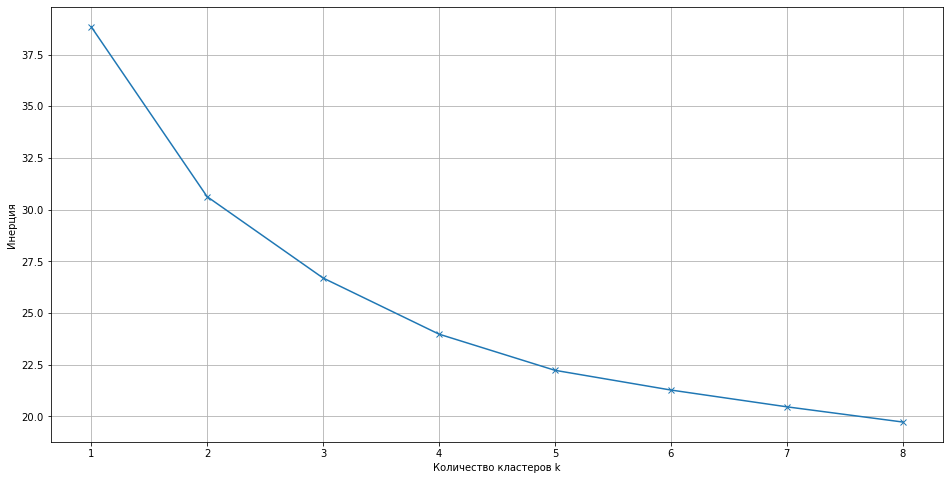

In [93]:
elbow_checker(KMeans, df_normalized)

In [99]:
silhouette_checker(KMeans, df_normalized)

 25%|████████████████████▌                                                             | 1/4 [18:18<54:56, 1098.94s/it]


KeyboardInterrupt: 

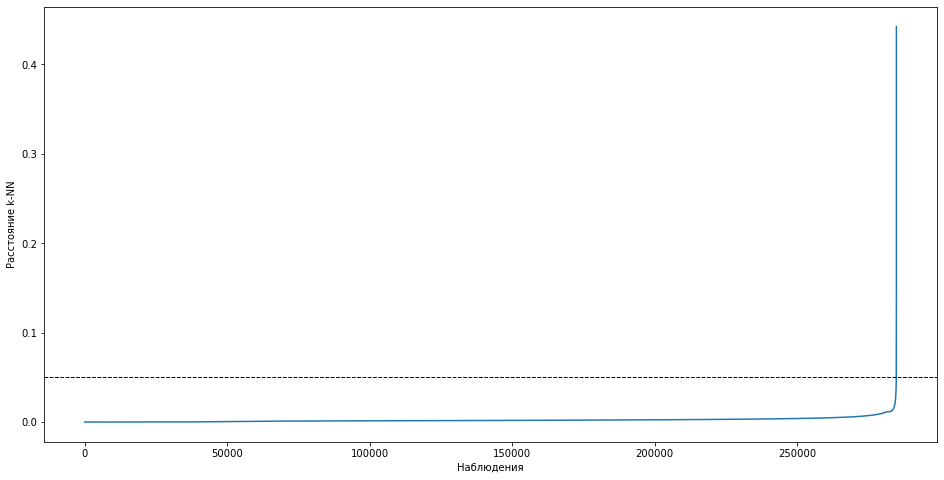

In [149]:
nbrs = NearestNeighbors(n_neighbors=df_normalized.shape[1] + 1).fit(df_normalized.drop(columns=['Class'], axis=1))
neigh_dist, neigh_ind = nbrs.kneighbors(df_normalized.drop(columns=['Class'], axis=1))
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16, 8))
plt.plot(k_dist)
plt.axhline(y=0.05, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("Расстояние k-NN")
plt.xlabel("Наблюдения")
plt.show()

In [ ]:
eps_list=np.arange(start=0.01, stop=0.03, step=0.01)
min_sample_list=np.arange(start=2, stop=df_normalized.shape[1], step=1)

silhouette_scores_data=pd.DataFrame()
silhouette = []
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        if(len(np.unique(db.fit_predict(df_normalized.drop(['Class'], axis=1)))) > 1):
            sil_score=silhouette_score(df_normalized.drop(['Class'], axis=1), db.fit_predict(df_normalized.drop(['Class'], axis=1)))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample:" + str(min_sample_trial)
        silhouette_scores_data = pd.concat([pd.DataFrame([[sil_score,trial_parameters]], columns=["score", "parameters"]), silhouette_scores_data], ignore_index=True)

In [ ]:
score_parameters = silhouette_scores_data.sort_values(by='score', ascending=False).head(1)
best_eps = float(score_parameters['parameters'][0].split(' ')[0].split(':')[1])
best_pts = int(score_parameters['parameters'][0].split(' ')[1].split(':')[1])
print(f'Лучшие параметры:')
print(score_parameters)